# 背景介绍
意图识别（Intent Recognition）是指通过自然语言文本来自动识别出用户的意图或目的的一项技术任务。在人机交互、语音识别、自然语言处理等领域中，意图识别扮演着至关重要的角色。

意图识别有很多用途，例如在搜索引擎中分析用户的核心搜索需求，在对话系统中了解用户想要什么业务或者闲聊，在身份识别中判断用户的身份信息等等。意图识别可以提高用户体验和服务质量。

# Task1 数据读取与分析
NLP是自然语言处理的缩写，是研究如何让计算机理解和处理自然语言的一门技术。自然语言是人类交流和表达思想的主要工具，具有丰富的语义和多样的形式。学习NLP需要掌握基本的语言学概念、文本预处理和文本表示方法等基础知识。语言学概念可以帮助我们分析自然语言的结构和规律，文本预处理可以帮助我们清洗和规范化文本数据，文本表示方法可以帮助我们将文本转换为计算机可处理的数值向量。

学习NLP很难的原因可能有以下几点：NLP涉及多个领域的知识，需要有较强的综合能力和自学能力；NLP是一个快速发展的领域，需要不断更新自己的知识和技能；NLP面临很多挑战和难题，如自然语言的歧义性、复杂性、多样性等。

- 步骤1：下载意图识别数据集，该数据集是一个多分类任务，目标是根据用户的输入文本判断用户的意图。意图识别数据集的加载方法如下代码。
- 步骤2：使用Pandas库读取数据集，Pandas是一个用于数据分析和处理的Python库，可以方便地读取、操作和保存各种格式的数据文件。使用Pandas的read_csv函数可以读取csv格式的数据文件，并返回一个DataFrame对象。
- 步骤3：统计训练集和测试集的类别分布、文本长度等基本信息，以了解数据集的特征和难度。使用DataFrame对象的value_counts函数可以统计每个类别出现的次数和比例，使用apply函数和len函数可以统计每个文本的长度。
- 步骤4：通过上述步骤，请回答下面问题
    - 数据集的文本长度分布一致吗？
    - 数据集中的文本是长文本还是短文本？根据统计结果，查看每个文本的长度分布情况，如文本长度的中位数。
    - 数据集中总共包含了多少个字符，多少个单词？将单词按照意图类别绘制云图。 


In [4]:
# 读取数据集，这里是直接联网读取，也可以通过下载文件，再读取
import pandas as pd

data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)
train_data.head() 
#  统计训练集的Intent分布
print("统计训练集的Intent分布：\n",train_data[1].value_counts())
print("显示意图类别分类：")
print(train_data[1].unique())
# 统计训练集的文本长度分布
print("训练集文本长度分布：\n",train_data[0].apply(len).describe())

统计训练集的Intent分布：
 1
FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: count, dtype: int64
显示意图类别分类：
['Travel-Query' 'Music-Play' 'FilmTele-Play' 'Video-Play' 'Radio-Listen'
 'HomeAppliance-Control' 'Weather-Query' 'Alarm-Update' 'Calendar-Query'
 'TVProgram-Play' 'Audio-Play' 'Other']
训练集文本长度分布：
 count    12100.000000
mean        15.138678
std          4.872583
min          4.000000
25%         12.000000
50%         15.000000
75%         18.000000
max         54.000000
Name: 0, dtype: float64


In [9]:
train_data.rename(columns={0:"text",1:"intent"},inplace = True ) 
test_data.rename(columns={0:"text",1:"intent"},inplace = True ) 
train_data.head() 

,text,intent
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


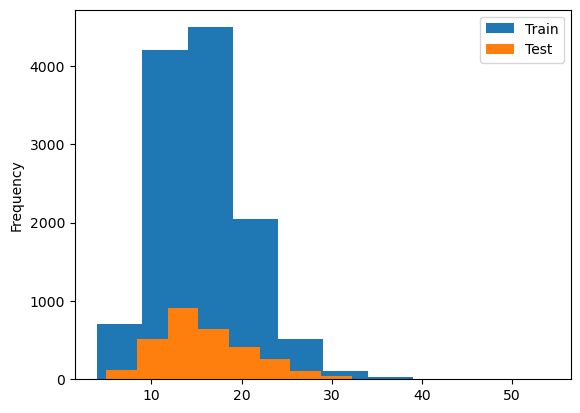

In [10]:
# 文本字符长度统计
import matplotlib.pyplot as plt  

 
train_data["text"].apply(len).plot(kind="hist")
test_data["text"].apply(len).plot(kind="hist")

plt.legend(["Train", "Test"])

In [14]:
# 统计字符数
char_count = train_data[0].str.len().sum()
print("train data 字符数：",char_count) 
# 统计单词数
word_count = train_data[0].apply(lambda x: len(x.split(' '))).sum() 
print("train data 单词数：",word_count)

train data 字符数： 183178
train data 单词数： 12195


Building prefix dict from the default dictionary ...


随便播放一首专辑阁楼里的佛里的歌单曲循环一首催眠的歌吧播放钢琴曲命运交响曲我要听治愈系的日语歌曲我一定要单曲循环赵雷的我们的时光这首流行播放一首适合开心时候听的歌曲呢我想听顽童的辣台妹能播放一下不2011年最浪漫的歌来一首呗来放一个德语歌曲给我吧播放日语歌泪的物语请给我来一首吴亦凡的英文歌July。循环播放张哲瀚的环绕吧请播放带戏曲唱腔的专辑赤伶，李玉刚版的一定循环播放我们的时光这首流行呼吸之野里的歌曲随便来一首播放一下吧法语歌曲可以随机来一首不可以随机给我来一曲山河令电视剧里面的歌呢90年代比较搞笑的歌曲来一些听听放一首扬琴版的梁祝给我找一首蔡琴的歌听听我想播放张信哲的下一个永远中的白月光想听最好的都给你了，要余佳运给我唱能给我来一个2021年的古典音乐不呢想听英文专辑了，就第stay with you吧，林俊杰的完美降落播放，法老他们合唱的随机播放一首纯音乐。请按随机播放一首张杰的中文歌曲播一首运动风格的中文歌曲初爱里面的歌可以随机唱一首吗林俊杰的专辑乐行者随机播放吧治愈系的钢琴曲能随便来个听吗顺序播放李健的歌曲1999年发行的歌都播放一遍呢随机来一首欢快一点的浪漫情歌吧来一首差一步里的歌儿播放一首应景儿的《回到拉萨》，我要郑钧的银临、河图的专辑蚍蜉渡海播放我想听金莎唱的爱的魔法这首流行音乐我需要你来一首许嵩的认错呢我要陈小熊的歌儿 济南济南吧请播放吴涤清版的《梅兰梅兰我爱你》放一首萨克斯演奏的古典音乐我想听英文的情歌呢顺序播放周杰伦的专辑七里香里面的歌这一生关于你的风景，我要听隔壁老樊唱的我想你给我播放一首表达爱意的钢琴曲呢单曲循环一下名侦探柯南里面的主题曲吧黄安90年代的歌随机来一首可以吗二胡弹奏的人气高的歌曲来一首呢有没有比较热血的动漫配乐给我来一首吧按顺序播放专辑Wuha里的歌曲2000年左右的歌曲给我随机来一首播放齐秦的大约在冬季你能给我放范丞丞的快乐很简单吗是不是能单曲循环一下你不知道的事放一下BEYOND的经典光辉岁月随机来一首2011年的歌听一下张国荣光荣岁月里面的歌吧还是想循环播放流行风格的专辑放一首rap，放十全九美随机播放一首李冠森的歌曲立刻播放萧忆情的拜无忧来一首2009年王力宏的曲子吧把悲伤留给自己单曲循环播放帮我找蔡徐坤的情人播一下第二街区这张专辑里的第一首循环放给我听Bieber的justice来毛不易像我这样的人我要听周深和王子一

Dumping model to file cache /var/folders/fx/x5xt5flx4_s_bhn2f7sx897r0000gn/T/jieba.cache
Loading model cost 0.356 seconds.
Prefix dict has been built successfully.


['随便', '播放', '一首', '专辑', '阁楼', '里', '的', '佛里', '的', '歌单', '曲', '循环', '一首', '催眠', '的', '歌', '吧', '播放', '钢琴曲', '命运', '交响曲', '我要', '听', '治愈', '系', '的', '日语', '歌曲', '我', '一定', '要', '单曲', '循环', '赵雷', '的', '我们', '的', '时光', '这首', '流行', '播放', '一首', '适合', '开心', '时候', '听', '的', '歌曲', '呢', '我', '想', '听', '顽童', '的', '辣台', '妹能', '播放', '一下', '不', '2011', '年', '最', '浪漫', '的', '歌来', '一首', '呗', '来', '放', '一个', '德语', '歌曲', '给', '我', '吧', '播放', '日语', '歌泪', '的', '物语', '请', '给', '我', '来', '一首', '吴亦凡', '的', '英文歌', 'July', '。', '循环', '播放', '张哲瀚', '的', '环绕', '吧', '请', '播放', '带', '戏曲', '唱腔', '的', '专辑', '赤伶', '，', '李玉刚', '版', '的', '一定', '循环', '播放', '我们', '的', '时光', '这首', '流行', '呼吸', '之野里', '的', '歌曲', '随便', '来', '一首', '播放', '一下', '吧', '法语', '歌曲', '可以', '随机', '来', '一首', '不', '可以', '随机', '给', '我', '来', '一曲', '山河', '令', '电视剧', '里面', '的', '歌', '呢', '90', '年代', '比较', '搞笑', '的', '歌曲', '来', '一些', '听听', '放', '一首', '扬琴', '版', '的', '梁祝', '给', '我', '找', '一首', '蔡琴', '的', '歌', '听听', '我', '想', '播放', '张信哲', '的', '下', '一个', '永远

([], [])

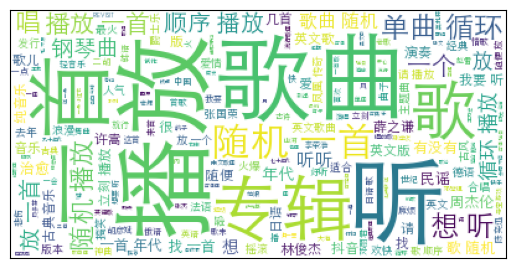

In [14]:
from wordcloud import WordCloud 
import matplotlib.pyplot  as plt 
import jieba 


# 中文分词
content = ''.join(train_data[train_data["intent"]=='Music-Play']["text"])
print(content)
words = jieba.lcut(content) 
print(words)

# 读取中文停用词
cn_stopwords = ''.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
words = [x for x in words if x not in cn_stopwords]
print(words)
# 中文字体，https://mirror.coggle.club/STHeiti-Light.ttc
# 手动下载中文字体到当前代码目录 
wordcloud = WordCloud(background_color = 'white', max_words = 1000, font_path = './STHeiti-Light.ttc')
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])               